## UNDERSTAND THE THEORY AND INTUITION BEHIND CAPITAL ASSET PRICING MODEL (CAPM)

* CAPM is the most important model in the finance.
* It is a model that describes the relationship between the expected return and risk of securites.
* It is indicates that the expected return on a security is equal to the risk free return plus a risk premium.

The formula for calculating the expected return of an asset given its risk is as follows:

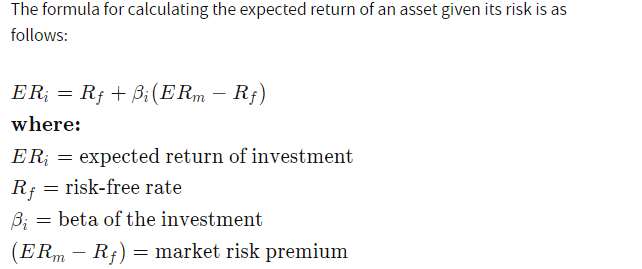


### Risk Free Asset (rf) 

CAPM assumes that there exist a risk free assest with zero standard deviation.

The risk free asset return is denoted as rf

investors who are extreamely risk averse would prefer to buy the risk free asset to protect their money and earn a low return rf.

if investors are intrested in more return , they have to bear more risk compared to the risk free asset.

### Market Portfolio(rm)

Market portfolio includes all securities in the market , A good representation of the market portfolio is the S&P500

The market overall return is denoted as rm

S&P500 is the 500 largest U.S publicly traded companies.

The index is viewed as a guage of large cap U.S equites 

The S&P500 includes the following stocks.
https://en.wikipedia.org/wiki/List_of_S%26P_500_companies


## What is Beta?

Beta represents the slope of the line regression line (market returns vs stock returns)

The beta (β) of an investment security (i.e. a stock) is a measurement of its volatility of returns relative to the entire market. It is used as a measure of risk and is an integral part of the Capital Asset Pricing Model (CAPMCapital Asset Pricing Model (CAPM)The Capital Asset Pricing Model (CAPM) is a model that describes the relationship between expected return and risk of a security. CAPM formula shows the return of a security is equal to the risk-free return plus a risk premium, based on the beta of that security). A company with a higher beta has greater risk and also greater expected returns.

The beta coefficient can be interpreted as follows:

β =1 exactly as volatile as the market
β >1 more volatile than the market
β <1>0 less volatile than the market
β =0 uncorrelated to the market
β <0 negatively correlated to the market


### IMPORT LIBRARIES/DATASETS AND VISUALIZE STOCKS DATA

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import seaborn as sns
import plotly.express as px
from copy import copy
from scipy import stats
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import plotly.graph_objects as go

In [ ]:
stocks_df = pd.read_csv(r'/kaggle/input/capital-asset-pricing-model-capm/stock.csv')
stocks_df.head()

In [ ]:
# Sort the data based on Date
stocks_df = stocks_df.sort_values(by = ['Date'])
stocks_df.head()

In [ ]:
# Function to normalize the prices based on the initial price
def normalize(df):
  x = df.copy()
  for i in x.columns[1:]:
    x[i] = x[i]/x[i][0]
  return x

In [ ]:
# Function to plot interactive plot
def interactive_plot(df, title):
  fig = px.line(title = title)
  for i in df.columns[1:]:
    fig.add_scatter(x = df['Date'], y = df[i], name = i)
  fig.show()


In [ ]:
# Plot interactive chart
interactive_plot(stocks_df, 'Prices')

In [ ]:
# Plot normalized interactive chart
interactive_plot(normalize(stocks_df), 'Normalized Prices')

## CALCULATE DAILY RETURNS

In [ ]:
# Function to calculate the daily returns 
def daily_return(df):

  df_daily_return = df.copy()
  
  # Loop through each stock
  for i in df.columns[1:]:
    
    # Loop through each row belonging to the stock
    for j in range(1, len(df)):
      
      # Calculate the percentage of change from the previous day
      df_daily_return[i][j] = ((df[i][j]- df[i][j-1])/df[i][j-1]) * 100
    
    # set the value of first row to zero, as previous value is not available
    df_daily_return[i][0] = 0
  return df_daily_return


In [ ]:
# Get the daily returns 
stocks_daily_return = daily_return(stocks_df)
stocks_daily_return.head()

In [ ]:
From above you stocks_daily_return.mean()

S&P500 average daily return is 0.049%
Amazon average daily return is 0.15%
Google average daily return is 0.084%

## CALCULATE BETA FOR A SINGLE STOCK

In [ ]:
# Select any stock, let's say Apple 
stocks_daily_return['AAPL']


In [ ]:
# Select the S&P500 (Market)
stocks_daily_return['sp500'].head()

In [ ]:
# plot a scatter plot between the selected stock and the S&P500 (Market)
stocks_daily_return.plot(kind = 'scatter', x = 'sp500', y = 'AAPL',figsize=(8, 8),color='green')
plt.show()


### Fit a polynomial between the selected stock and the S&P500 (Poly with order = 1 is a straight line)
### beta represents the slope of the line regression line (market return vs. stock return). 
### Beta is a measure of the volatility or systematic risk of a security or portfolio compared to the entire market (S&P500) 
### Beta is used in the CAPM and describes the relationship between systematic risk and expected return for assets 
### Beta = 1.0, this indicates that its price activity is strongly correlated with the market. 
### Beta < 1, indicates that the security is theoretically less volatile than the market (Ex: Utility stocks). If the stock is included, this will make the portfolio less risky compared to the same portfolio without the stock.
### Beta > 1, indicates that the security's price is more volatile than the market. For instance, Tesla stock beta is 1.26 indicating that it's 26% more volatile than the market. 
### Tech stocks generally have higher betas than S&P500 but they also have excess returns
### MGM is 65% more volatile than the S&P500!

In [ ]:
beta, alpha = np.polyfit(stocks_daily_return['sp500'], stocks_daily_return['AAPL'], 1)
print('Beta for {} stock is = {} and alpha is = {}'.format('AAPL', round(beta,3), round(alpha,3)))  

In [ ]:
# Now let's plot the scatter plot and the straight line on one plot
stocks_daily_return.plot(kind = 'scatter', x = 'sp500', y = 'AAPL',figsize=(8, 8))

# Straight line equation with alpha and beta parameters 
# Straight line equation is y = beta * rm + alpha
plt.plot(stocks_daily_return['sp500'], beta * stocks_daily_return['sp500'] + alpha, '--', color = 'r')
plt.show()

In [ ]:
beta, alpha = np.polyfit(stocks_daily_return['sp500'], stocks_daily_return['TSLA'], 1)
print('Beta for {} stock is = {} and alpha is = {}'.format('TSLA', round(beta,3), round(alpha,3))) 

In [ ]:
# Now let's plot the scatter plot and the straight line on one plot
stocks_daily_return.plot(kind = 'scatter', x = 'sp500', y = 'TSLA',figsize=(8, 8))

# Straight line equation with alpha and beta parameters 
# Straight line equation is y = beta * rm + alpha
plt.plot(stocks_daily_return['sp500'], beta * stocks_daily_return['sp500'] + alpha, '-', color = 'g')
plt.show()

In [ ]:
## APPLY THE CAPM FORMULA TO AN INDIVIDUAL STOCK

In [ ]:
beta

In [ ]:
# Let's calculate the average daily rate of return for S&P500
stocks_daily_return['sp500'].mean()

In [ ]:
# Let's calculate the annualized rate of return for S&P500 
# Note that out of 365 days/year, stock exchanges are closed for 104 days during weekend days (Saturday and Sunday) 
# Check your answers with: https://dqydj.com/sp-500-return-calculator/
rm = round(stocks_daily_return['sp500'].mean() * 252,3)
rm

In [ ]:
# Assume risk free rate is zero
# Also you can use the yield of a 10-years U.S. Government bond as a risk free rate
rf = 0.66 

# Calculate return for any security (APPL) using CAPM  
ER_AAPL = round(rf + ( beta * (rm-rf) ) ,3)
ER_AAPL


In [ ]:
# You have to calculate Beta for AT&T first
beta, alpha = np.polyfit(stocks_daily_return['sp500'], stocks_daily_return['T'], 1)
print('Beta for {} stock is = {} and alpha is = {}'.format('T', round(beta,3), round(alpha,3)))

In [ ]:
# Calculate return for AT&T using CAPM  
ER_T = round(rf + ( beta * (rm - rf) ),3) 
print(ER_T)

In [ ]:
# Let's do the same plots but in an interactive way
# Explore some wierd points in the dataset: Tesla stock return was at 24% when the S&P500 return was -0.3%!

for i in stocks_daily_return.columns:
  
  if i != 'Date' and i != 'sp500':
    
    # Use plotly express to plot the scatter plot for every stock vs. the S&P500
    fig = px.scatter(stocks_daily_return, x = 'sp500', y = i, title = i)

    # Fit a straight line to the data and obtain beta and alpha
    b, a = np.polyfit(stocks_daily_return['sp500'], stocks_daily_return[i], 1)
    
    # Plot the straight line 
    fig.add_scatter(x = stocks_daily_return['sp500'], y = b*stocks_daily_return['sp500'] + a)
    fig.show()


### CALCULATE BETA FOR ALL STOCKS

In [ ]:
# Let's view Beta for every stock 
beta

In [ ]:
# Let's view alpha for each of the stocks
# Alpha describes the strategy's ability to beat the market (S&P500)
# Alpha indicates the “excess return” or “abnormal rate of return,” 
# A positive 0.175 alpha for Tesla means that the portfolio’s return exceeded the benchmark S&P500 index by 17%.

alpha

In [ ]:
# # Let's create a placeholder for all betas and alphas (empty dictionaries)
beta = {}
alpha = {}

# Loop on every stock daily return
for i in stocks_daily_return.columns:

  # Ignoring the date and S&P500 Columns 
  if i != 'Date' and i != 'sp500':
    # plot a scatter plot between each individual stock and the S&P500 (Market)
    stocks_daily_return.plot(kind = 'scatter', x = 'sp500', y = i,figsize=(8, 8))
    
    # Fit a polynomial between each stock and the S&P500 (Poly with order = 1 is a straight line)
    b, a = np.polyfit(stocks_daily_return['sp500'], stocks_daily_return[i], 1)
    
    plt.plot(stocks_daily_return['sp500'], b * stocks_daily_return['sp500'] + a, '-', color = 'r')
    
    beta[i] = b
    
    alpha[i] = a
    
    plt.show()

In [ ]:
# Obtain a list of all stock names
keys = list(beta.keys())
keys

In [ ]:
# Define the expected return dictionary
ER = {}

rf = 0.66
rm = round(stocks_daily_return['sp500'].mean() * 252,3) # this is the expected return of the market 
rm

From Business & Market :

Technology company : AAPL

Aerospace company : BA

Telecommunications company : T

Hospitality company : MGM

E-commerce company : AMZN

Computer hardware company : IBM

Electric car company : TSLA

Multinational conglomerate company : GOOG

In [ ]:
for i in keys:
  # Calculate return for every security using CAPM  
  ER[i] = rf + ( beta[i] * (rm-rf) ) 

In [ ]:
for i in keys:
  print('Expected Return Based on CAPM for {} is {}%'.format(i, round(ER[i],3)))

In [ ]:
# Assume equal weights in the portfolio
portfolio_weights = 1/8 * np.ones(8) 
portfolio_weights

In [ ]:
# Calculate the portfolio return 
ER_portfolio_all = round(sum(list(ER.values()) * portfolio_weights),3)
print('Expected Return Based on CAPM for the portfolio  is {}%\n'.format(ER_portfolio_all))

### Suggested to invest, Returns better than S&P 500

In [ ]:
# Calculate the portfolio return 
ER_portfolio = round(0.50 * ER['AAPL'] +  0.50 * ER['AMZN'],3)
print('Expected Return Based on CAPM for the portfolio (50% allocation in Apple and 50% in Amazon) is {}%\n'
      .format(ER_portfolio))


Suggested to invest, Returns better than S&P 500

In [ ]:
# Calculate the portfolio return 
ER_portfolio_ConsumerServices = round(0.50 * ER['T'] +  0.50 * ER['MGM'],3)
print('Expected Return Based on CAPM for the portfolio (Consumer Services) is {}%\n'
      .format(ER_portfolio_ConsumerServices))

Suggested to invest, Returns better than S&P 500

In [ ]:
# Calculate the portfolio return 
ER_portfolio_Manufacturing = round(0.50 * ER['TSLA'] +  0.50 * ER['BA'],3)
print('Expected Return Based on CAPM for the portfolio (Manufacturing Sector) is {}%\n'
      .format(ER_portfolio_Manufacturing))

Suggested to invest, Returns better than S&P 500

In [ ]:
# Calculate the portfolio return 
ER_portfolio_PersonalDevices = round(0.25 * ER['AAPL'] +  0.25 * ER['IBM']+0.25 * ER['GOOG'] +  0.25 * ER['AMZN'],3)
print('Expected Return Based on CAPM for the portfolio (Personal Devices Sector) is {}%\n'
      .format(ER_portfolio_PersonalDevices))

Suggested to invest, Returns better than S&P 500

In [ ]:
ER_portfolio_bm = round(0.25 * ER['T'] +  0.25 * ER['IBM']+0.25 * ER['GOOG'] +  0.25 * ER['AMZN'],3)
print('Expected Return Based on CAPM for the portfolio (Less than Market Return) is {}%\n'
      .format(ER_portfolio_bm))


Suggested not to invest, Returns better than S&P 500

In [ ]:
ER_portfolio_am = round(0.25 * ER['AAPL'] +  0.25 * ER['BA']+ 0.25 * ER['MGM'] + 0.25 * ER['TSLA'] ,3)
print('Expected Return Based on CAPM for the portfolio (Above than  Market Return) is {}%\n'
      .format(ER_portfolio_am))

Suggested to invest, Returns better than S&P 500

In [ ]:
sum=0
for i in keys:
    sum=sum+ER[i] 
for i in keys:
  print('Contribution on CAPM for {} is {}'.format(i, round(ER[i]/sum,2)))

In [ ]:
ER_portfolio_b = round(.12 * ER['AAPL'] +  .15 * ER['BA']+ 0.08 * ER['T'] + .18 * ER['MGM']+ 
                     0.11 * ER['AMZN'] +  .11 * ER['IBM']+ .14* ER['TSLA'] + .11* ER['GOOG'],3)
print('Expected Return Based on CAPM for the portfolio (Balanced Weightage) is {}%\n'
      .format(ER_portfolio_b))

Suggested to invest, Returns better than S&P 500

In [ ]:
ER_portfolio_hp = round(0.33 * ER['TSLA'] +  0.33 * ER['BA']+ 0.34 * ER['MGM'] ,3)
print('Expected Return Based on CAPM for the portfolio (High performing) is {}%\n'
      .format(ER_portfolio_hp))

Suggested to invest, Returns better than S&P 500

In [ ]:
# Calculate the portfolio return 
ER_portfolio_lp = round(0.33 * ER['T'] +  0.33 * ER['GOOG']+0.34 * ER['IBM'],3)
print('Expected Return Based on CAPM for the portfolio (Weak performing) is {}%\n'
      .format(ER_portfolio_lp))

Suggested not to invest, Returns better than S&P 500

In [ ]:
ER_portfolio_ap = round(ER['AAPL'] ,3)
print('Expected Return Based on CAPM for the portfolio (Average performing) is {}%\n'
      .format(ER_portfolio_ap))

Suggested to invest, Returns better than S&P 500



In [ ]:
# Calculate the portfolio return 
ER_portfolio_ed = round(0.50 * ER['T'] +  0.50 * ER['MGM'],3)
print('Expected Return Based on CAPM for the portfolio (Extremes) is {}%\n'
      .format(ER_portfolio_ed))

Suggested to invest, Returns better than S&P 500

In [ ]:
# Calculate the portfolio return 
ER_portfolio_ed = round(0.50 * ER['GOOG'] +  0.50 * ER['AAPL'],3)
print('Expected Return Based on CAPM for the portfolio (Median) is {}%\n'
      .format(ER_portfolio_ed))

In [ ]:
#Suggested to invest, Returns better than S&P 500

In [ ]:
data = {'Combinations':['AAPL', 'BA', 'T', 'MGM','AMZN','IBM','TSLA','GOOG','Equal Portfolio Weights',
                        'AAPL+AMZN','Consumer Services','Manufacturing Sector','Personal Devices Sector',
                        'Less than Market Return','Above than  Market Return','Balanced Weightage',
                        'High performing','Weak performing','Average performing','Extremes','Median'], 
        'Expected Return Based on CAPM':[13.757,16.934, 9.423, 20.119,12.331,11.962,15.589,12.838,14.119,
                                         13.044,14.771,16.261,12.722,11.639,16.6,14.833,17.573,11.413,
                                         13.757,14.771,13.298]} 
Returns = pd.DataFrame(data)
Returns.sort_values(by='Expected Return Based on CAPM', ascending=False,inplace=True)
Returns

In [ ]:
print("Top 5 Suggested Portfolio") 
Returns[:5]

In [ ]:
print("Bottom 5 Suggested Portfolio") 
Returns.tail()